In [36]:
# Dependencies and Setup
%matplotlib inline
from config import gkey
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from scipy.stats import pearsonr
from numpy import cov
from scipy import stats


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
population = pd.read_csv("Resources/Census-Data-by-Chicago-Community-Area-2016.csv")
potholes = pd.read_csv("Resources/311_Service_Requests_-_Pot_Holes_Reported_-_Historical-2016.csv")

crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")
parks = pd.read_csv("Resources/CPD_Parks.csv")
sociecn = pd.read_csv("Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")
sociecn = sociecn[:-1]
sociecn['Community Area Number'] = sociecn['Community Area Number'].astype(int)
sociecn = sociecn.rename(columns = {'Community Area Number':'Community Area'})


In [37]:
potholes.head()
potholes_df=pd.DataFrame(potholes)

In [38]:
potholes_df=potholes.groupby(['Community Area'], as_index=False)

potholes_group=potholes_df.count()

potholes_group

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
0,0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1,1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3,3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4,4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5,5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633
6,6.0,990,990,990,990,990,790,790,790,990,990,990,990,990,990,704,990,990,990
7,7.0,915,915,915,915,915,747,747,749,915,914,915,915,915,915,182,915,915,915
8,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,1309,1310,1310,1310,1310,30,1309,1309,1309
9,9.0,532,532,532,532,532,326,326,326,532,532,532,532,532,532,0,532,532,532


In [39]:
#Drop non neighborhood (Community zero 0)

potholes_group = potholes_group.drop(potholes_group.index[0])

In [40]:
potholes_group

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
1,1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3,3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4,4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5,5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633
6,6.0,990,990,990,990,990,790,790,790,990,990,990,990,990,990,704,990,990,990
7,7.0,915,915,915,915,915,747,747,749,915,914,915,915,915,915,182,915,915,915
8,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,1309,1310,1310,1310,1310,30,1309,1309,1309
9,9.0,532,532,532,532,532,326,326,326,532,532,532,532,532,532,0,532,532,532
10,10.0,1495,1495,1495,1495,1495,1005,1005,1010,1495,1495,1492,1492,1495,1495,0,1495,1495,1495


In [41]:
crime=crime[['Ward','Community Area']]
community_crime=crime.groupby(['Community Area'], as_index=False)
crime_group=community_crime.count()
crime_group

,Community Area,Ward
0,1,869
1,2,868
2,3,847
3,4,525
4,5,376
5,6,1507
6,7,1074
7,8,2692
8,9,76
9,10,337


In [42]:

population

,Community,Community Area,population
0,Rogers Park,1,54402
1,West Ridge,2,72211
2,Uptown,3,55137
3,Lincoln Square,4,40761
4,North Center,5,34623
5,Lake View,6,98212
6,Lincoln Park,7,66959
7,Near North Side,8,89465
8,Edison Park,9,11356
9,Norwood Park,10,36083


In [43]:
merged_df=potholes_group.merge(population, on='Community Area', how='left')



In [44]:
merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,701,701,321,701,701,701,Rogers Park,54402
1,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,1603,1603,142,1603,1603,1603,West Ridge,72211
2,3.0,485,485,485,485,485,373,373,376,485,...,485,485,485,485,314,485,485,485,Uptown,55137
3,4.0,632,632,632,632,632,412,412,411,632,...,632,632,632,632,228,632,632,632,Lincoln Square,40761
4,5.0,633,633,633,633,633,431,431,431,633,...,633,633,633,633,256,633,633,633,North Center,34623
5,6.0,990,990,990,990,990,790,790,790,990,...,990,990,990,990,704,990,990,990,Lake View,98212
6,7.0,915,915,915,915,915,747,747,749,915,...,915,915,915,915,182,915,915,915,Lincoln Park,66959
7,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,...,1310,1310,1310,1310,30,1309,1309,1309,Near North Side,89465
8,9.0,532,532,532,532,532,326,326,326,532,...,532,532,532,532,0,532,532,532,Edison Park,11356
9,10.0,1495,1495,1495,1495,1495,1005,1005,1010,1495,...,1492,1492,1495,1495,0,1495,1495,1495,Norwood Park,36083


In [45]:
merged_df=merged_df.merge(crime_group, on="Community Area", how='left')
merged_df=merged_df.rename(columns={'Ward_y':'Crime Count'})

In [46]:
merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,Y COORDINATE,Ward_x,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Crime Count
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,701,321,701,701,701,Rogers Park,54402,869
1,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,1603,142,1603,1603,1603,West Ridge,72211,868
2,3.0,485,485,485,485,485,373,373,376,485,...,485,485,485,314,485,485,485,Uptown,55137,847
3,4.0,632,632,632,632,632,412,412,411,632,...,632,632,632,228,632,632,632,Lincoln Square,40761,525
4,5.0,633,633,633,633,633,431,431,431,633,...,633,633,633,256,633,633,633,North Center,34623,376
5,6.0,990,990,990,990,990,790,790,790,990,...,990,990,990,704,990,990,990,Lake View,98212,1507
6,7.0,915,915,915,915,915,747,747,749,915,...,915,915,915,182,915,915,915,Lincoln Park,66959,1074
7,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,...,1310,1310,1310,30,1309,1309,1309,Near North Side,89465,2692
8,9.0,532,532,532,532,532,326,326,326,532,...,532,532,532,0,532,532,532,Edison Park,11356,76
9,10.0,1495,1495,1495,1495,1495,1005,1005,1010,1495,...,1492,1495,1495,0,1495,1495,1495,Norwood Park,36083,337


In [47]:
merged_df['Crime Count Adjusted']=merged_df['Crime Count']/merged_df['population']

In [48]:
merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,Ward_x,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Crime Count,Crime Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,321,701,701,701,Rogers Park,54402,869,0.015974
1,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,142,1603,1603,1603,West Ridge,72211,868,0.012020
2,3.0,485,485,485,485,485,373,373,376,485,...,485,485,314,485,485,485,Uptown,55137,847,0.015362
3,4.0,632,632,632,632,632,412,412,411,632,...,632,632,228,632,632,632,Lincoln Square,40761,525,0.012880
4,5.0,633,633,633,633,633,431,431,431,633,...,633,633,256,633,633,633,North Center,34623,376,0.010860
5,6.0,990,990,990,990,990,790,790,790,990,...,990,990,704,990,990,990,Lake View,98212,1507,0.015344
6,7.0,915,915,915,915,915,747,747,749,915,...,915,915,182,915,915,915,Lincoln Park,66959,1074,0.016040
7,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,...,1310,1310,30,1309,1309,1309,Near North Side,89465,2692,0.030090
8,9.0,532,532,532,532,532,326,326,326,532,...,532,532,0,532,532,532,Edison Park,11356,76,0.006692
9,10.0,1495,1495,1495,1495,1495,1005,1005,1010,1495,...,1495,1495,0,1495,1495,1495,Norwood Park,36083,337,0.009340


In [50]:
merged_df['Pothole Count Adjusted']=merged_df['CREATION DATE']/merged_df['population']

In [51]:

merged_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Crime Count,Crime Count Adjusted,Pothole Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,701,321,701,701,701,Rogers Park,54402,869,0.015974,0.012886
1,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,142,1603,1603,1603,West Ridge,72211,868,0.012020,0.022199
2,3.0,485,485,485,485,485,373,373,376,485,...,485,314,485,485,485,Uptown,55137,847,0.015362,0.008796
3,4.0,632,632,632,632,632,412,412,411,632,...,632,228,632,632,632,Lincoln Square,40761,525,0.012880,0.015505
4,5.0,633,633,633,633,633,431,431,431,633,...,633,256,633,633,633,North Center,34623,376,0.010860,0.018283
5,6.0,990,990,990,990,990,790,790,790,990,...,990,704,990,990,990,Lake View,98212,1507,0.015344,0.010080
6,7.0,915,915,915,915,915,747,747,749,915,...,915,182,915,915,915,Lincoln Park,66959,1074,0.016040,0.013665
7,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,...,1310,30,1309,1309,1309,Near North Side,89465,2692,0.030090,0.014643
8,9.0,532,532,532,532,532,326,326,326,532,...,532,0,532,532,532,Edison Park,11356,76,0.006692,0.046847
9,10.0,1495,1495,1495,1495,1495,1005,1005,1010,1495,...,1495,0,1495,1495,1495,Norwood Park,36083,337,0.009340,0.041432


In [55]:
covariance=cov(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
covariance

array([[ 2.94805350e-04, -1.51859431e-05],
       [-1.51859431e-05,  1.04046922e-04]])

In [57]:
corr, _ = pearsonr(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.087


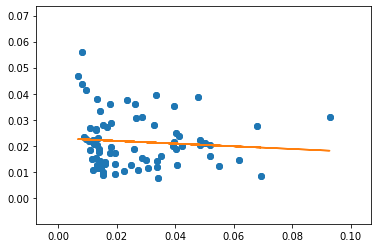

In [60]:
plt.scatter(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
line = slope*merged_df['Crime Count Adjusted']+intercept
plt.plot(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'],'o',merged_df['Crime Count Adjusted'] , line)

In [ ]:
covariance=cov(x,y)

In [ ]:
covariance

In [ ]:
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)